In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


DQN_single_t4td/
max t4t frac:  0.85
mean t4t frac:  0.5611038961038961
std t4t frac:  0.10639037213733991
DQN_single_t4td_small/
max t4t frac:  0.806
mean t4t frac:  0.5641493506493507
std t4t frac:  0.09060122289730661
DQN_single_t4t/
max t4t frac:  0.562
mean t4t frac:  0.49937662337662336
std t4t frac:  0.015483161327788039
DQN_single_t4t_small/
max t4t frac:  0.546
mean t4t frac:  0.49933116883116885
std t4t frac:  0.015688963444361433


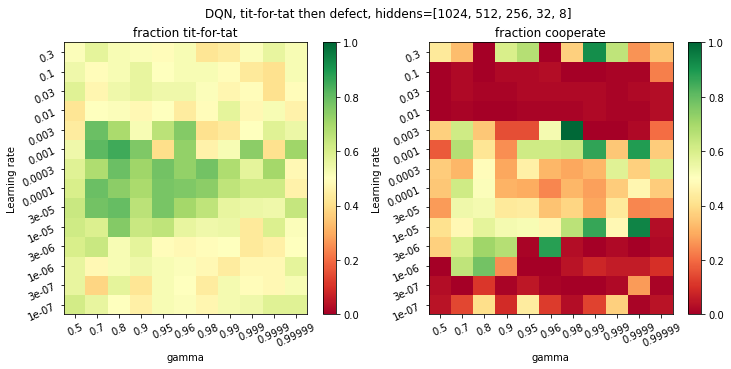

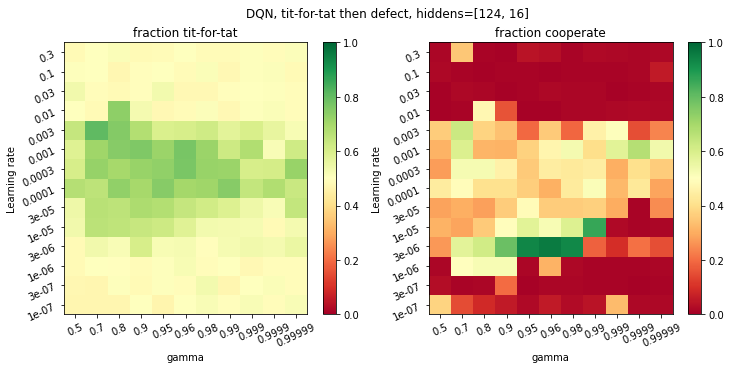

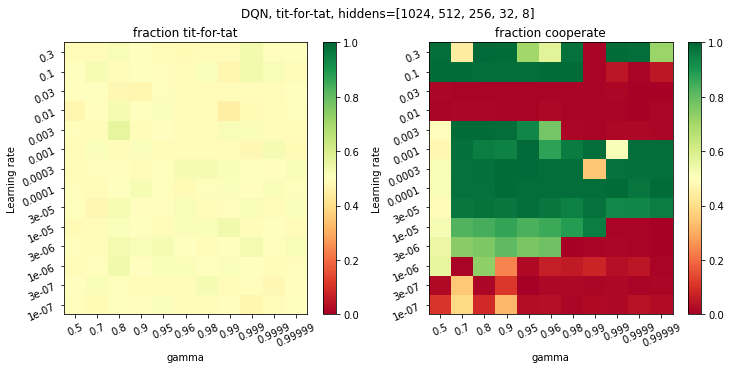

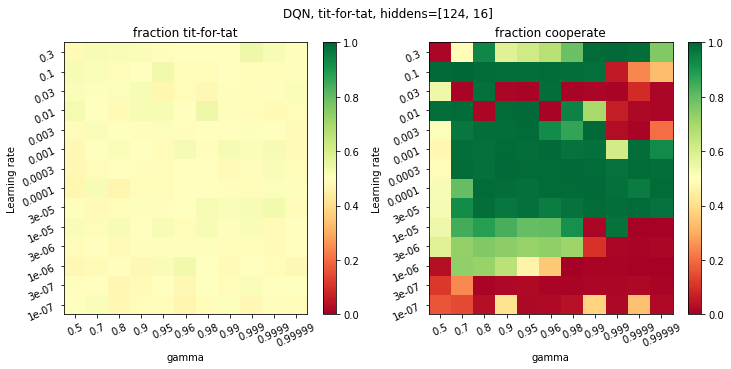

In [2]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['DQN, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat then defect, hiddens=[124, 16]',
          'DQN, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
        
        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0,1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    plt.clim([0,1])
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


PPO_single_t4td/
max t4t frac:  0.75
mean t4t frac:  0.5147727272727274
std t4t frac:  0.13418929364493137
PPO_single_t4td_small/
max t4t frac:  0.82
mean t4t frac:  0.56487012987013
std t4t frac:  0.08842956704945786
PPO_single_t4t/
max t4t frac:  0.58
mean t4t frac:  0.3939393939393939
std t4t frac:  0.20889230796490668
PPO_single_t4t_small/
max t4t frac:  0.62
mean t4t frac:  0.4957142857142857
std t4t frac:  0.050101936905000526


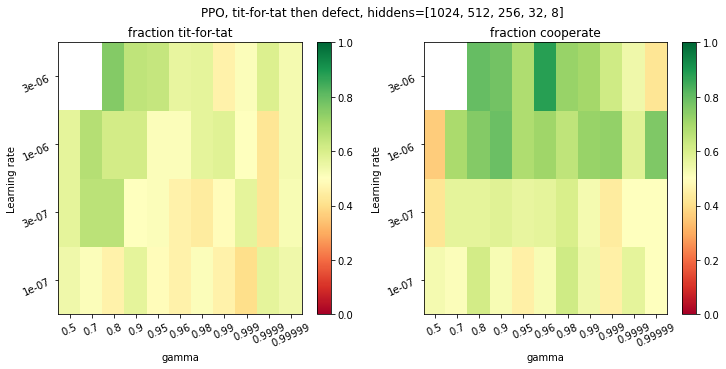

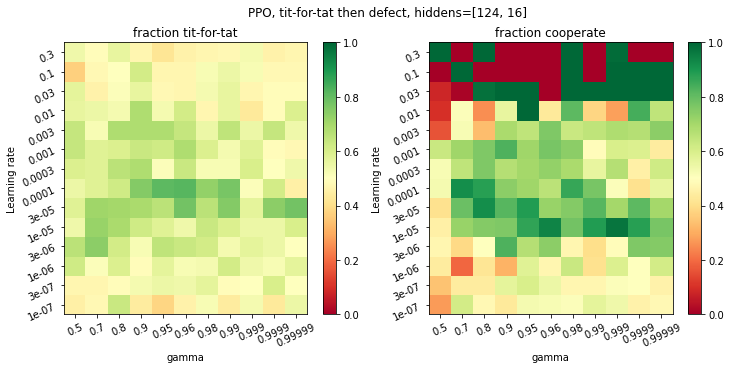

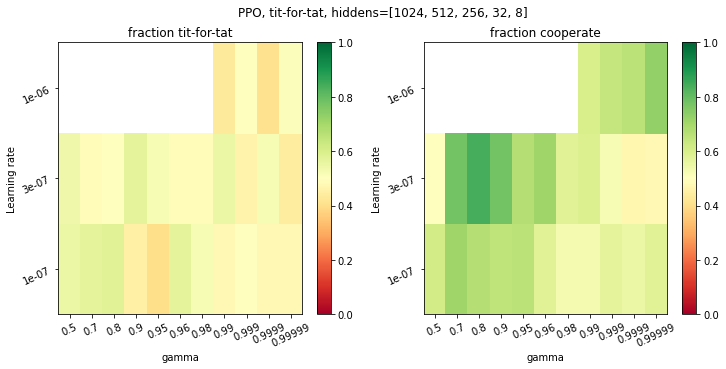

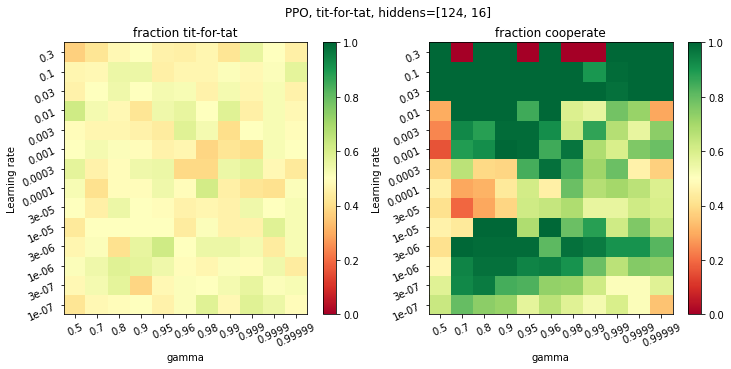

In [4]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4td_small/' , 'PPO_single_t4t/', 'PPO_single_t4t_small/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
# exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['PPO, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat then defect, hiddens=[124, 16]',
          'PPO, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
        
        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]

        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0, 1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.clim([0, 1])
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))